In [1]:
import pandas as pd
from json import loads
from ast import literal_eval
df = pd.read_csv(filepath_or_buffer='/kaggle/input/text-and-meta-data-analysis/train.csv', )
df['perplexity_score'] = df['meta'].apply(func=lambda x: literal_eval(x)['perplexity_score'])
df['pile_set_name'] = df['meta'].apply(func=lambda x: literal_eval(x)['pile_set_name'])
df = df.drop(columns=['meta'])
df = df.dropna(subset=['text'])
df.head()

,text,perplexity_score,pile_set_name
0,"It is done, and submitted. You can play “Survi...",327.0,Pile-CC
1,"<?xml version=""1.0"" encoding=""UTF-8""?>\r\n<seg...",977.7,Github
2,Article content\n\nHuman behavior has a tremen...,609.4,OpenWebText2
3,Topic: reinvent midnight madness\n\nAmazon ann...,262.3,Pile-CC
4,About Grand Slam Fishing Charters\n\nAs a fami...,858.9,Pile-CC


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99996 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   text              99996 non-null  object 
 1   perplexity_score  99996 non-null  float64
 2   pile_set_name     99996 non-null  object 
dtypes: float64(1), object(2)
memory usage: 3.1+ MB


In [3]:
df['xml'] = df['text'].apply(func=lambda x: x.startswith('<?xml'))
print('We have {} rows that are XML.'.format(df['xml'].sum()))

We have 321 rows that are XML.


In [4]:
# Let's clean up the text
df['clean'] = df['text'].str.replace('\n', ' ') # remove newlines
# extract the clean data as a seprate DataFrame
clean_df = df[~df['xml']].drop(columns=['text', 'perplexity_score', 'pile_set_name', 'xml']).rename(columns={'clean': 'text'})
clean_df.head()

,text
0,"It is done, and submitted. You can play “Survi..."
2,Article content Human behavior has a tremendo...
3,Topic: reinvent midnight madness Amazon annou...
4,About Grand Slam Fishing Charters As a family...
5,Q: Why was Mundungus banned from the Hog's He...


(-0.5, 1199.5, 1199.5, -0.5)

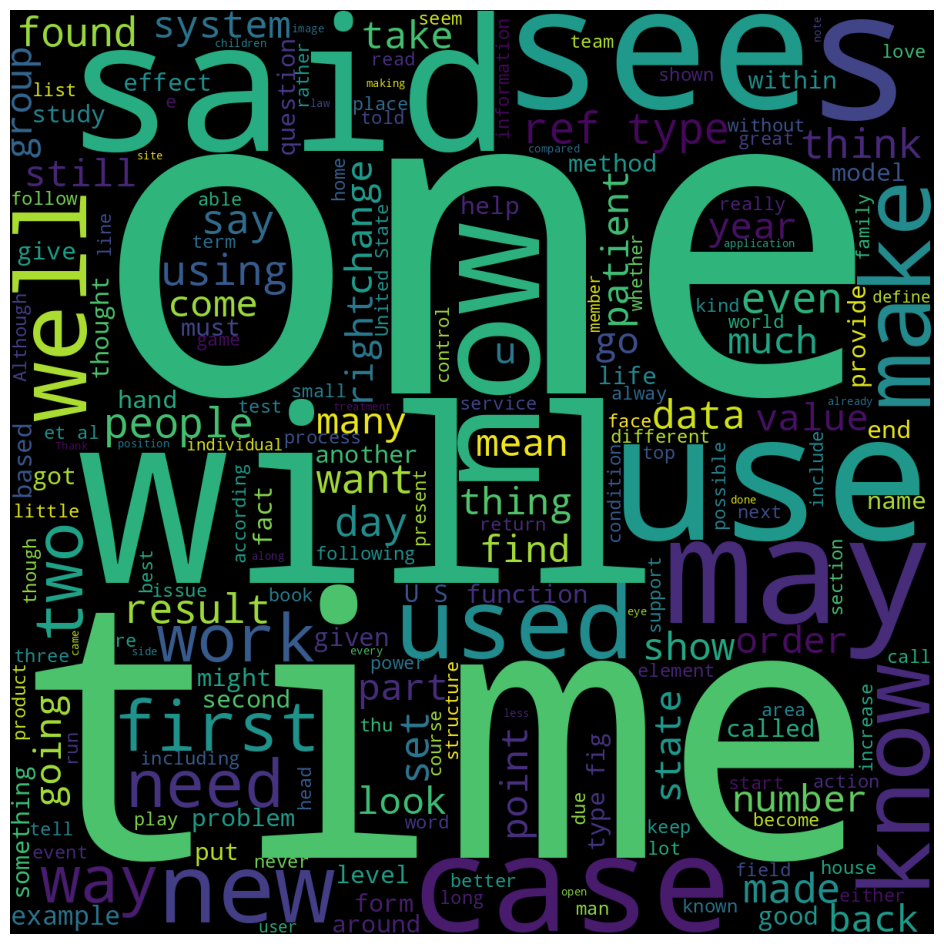

In [5]:
from matplotlib.pyplot import subplots
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from wordcloud import WordCloud
from wordcloud import STOPWORDS

FRACTION = 0.2
subplots(figsize=(12, 12))
# we want to cut out initials so we need to filter a little
text = ' '.join(clean_df.sample(frac=FRACTION, random_state=2023)['text'].values)
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, stopwords=STOPWORDS,).generate(text=text), )
axis('off')